In [64]:

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
import numpy as np  
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter 

# Supervised Learning  

# Understanding the Data set 

In [65]:
df = pd.read_csv('Base2.csv')
df 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,141,0.72,0.06,0.01,0.01,0.01,0.00,0.00,0.00,normal
148513,0,tcp,http,SF,317,938,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.00,0.00,0.00,normal
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.07,0.07,anomaly
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,252,0.99,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [66]:
df.describe() 

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13 

In [68]:
# Good No Null Values!
df.isnull().sum().max() 

0

In [69]:
df.columns 

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [70]:
df["class"].unique() 
df["class"].value_counts()
#Le data set est équilibré  

normal     77054
anomaly    71463
Name: class, dtype: int64

In [71]:
df.head() 

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


anormaly 48.12 % of the dataset
normal 51.88 % of the dataset


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n ( anormaly||  normaly)')

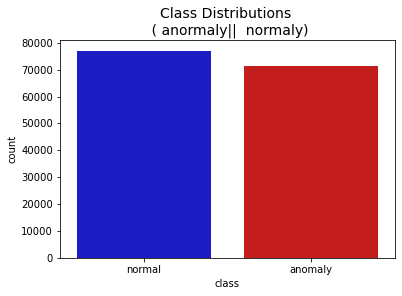

In [72]:
print('anormaly', round(df['class'].value_counts()['anomaly']/len(df) * 100,2), '% of the dataset')
print('normal', round(df['class'].value_counts()['normal']/len(df) * 100,2), '% of the dataset')
#the dataset  est plus au moins equilibré 
colors = ["#0101DF", "#DF0101"]

sns.countplot('class', data=df, palette=colors)
plt.title('Class Distributions \n ( anormaly||  normaly)', fontsize=14) 

# Encodage 

In [73]:
le = preprocessing.LabelEncoder()
df['class']=le.fit_transform(df['class'])

In [74]:
df["protocol_type"].unique()  

array(['tcp', 'udp', 'icmp'], dtype=object)

In [75]:
df["flag"].unique()  

array(['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3',
       'S2', 'OTH'], dtype=object)

In [76]:
df["service"].unique() 

array(['ftp_data', 'other', 'private', 'http', 'remote_job', 'name',
       'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u',
       'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp',
       'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap',
       'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois',
       'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login',
       'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u',
       'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell',
       'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i',
       'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i',
       'http_8001', 'aol', 'http_2784', 'tftp_u', 'harvest'], dtype=object)

In [77]:
# OneHotEncoding encoding of protocol_type , service and flag columns 
from sklearn.preprocessing import OneHotEncoder 
ohe=OneHotEncoder() 
ohe.fit_transform(df[['protocol_type','service','flag']]).toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [78]:
#Encodage des  variable catégoriques protocol_type , service et flag 
feature_arr=ohe.fit_transform(df[['protocol_type','service','flag']]).toarray() 
ohe.categories_
feature_labels= ohe.categories_ 
feature_labels=['icmp', 'tcp', 'udp','IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier',
        'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u',
        'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp',
        'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784',
        'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell',
        'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm',
        'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u',
        'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private',
        'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh',
        'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time',
        'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois','OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3',
        'SF', 'SH']

In [79]:
features=pd.DataFrame(feature_arr,columns=feature_labels)
df=pd.concat([df,features],axis=1)
df


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,tcp,http,SF,232,8153,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,tcp,http,SF,199,420,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148513,0,tcp,http,SF,317,938,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148514,0,tcp,http,SF,54540,8314,0,0,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148515,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
df.drop(['protocol_type','service','flag'], axis=1, inplace=True)

In [81]:
df

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148512,0,794,333,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148513,0,317,938,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148514,0,54540,8314,0,0,0,2,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
148515,0,42,42,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,0.101557,0.015722,0.000707,0.020806,0.248214,0.002599,0.000956,0.002007,0.604779,0.002316
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,0.302066,0.124399,0.026580,0.142734,0.431978,0.050915,0.030907,0.044749,0.488900,0.048072
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Features selection 

Selection par variance 

In [83]:
df.var(axis=0) 

duration          6.054961e+06
src_bytes         2.926390e+13
dst_bytes         1.371610e+13
land              2.154186e-04
wrong_fragment    5.763316e-02
                      ...     
S1                2.592292e-03
S2                9.552118e-04
S3                2.002492e-03
SF                2.390229e-01
SH                2.310884e-03
Length: 123, dtype: float64

In [84]:
X = df.drop('class', axis=1) 
y = df['class']

In [85]:
# Some Features has very low variance 
# we can apply VarianceThreshold selector (not really recommended less complex than Wapped method)  
from sklearn.feature_selection import VarianceThreshold 
selector= VarianceThreshold(threshold=0.25)
selector.fit_transform(X).shape 

(148517, 11)

Splitting the dataset into train and test set 

In [86]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [48]:
pipe_rf= make_pipeline(StandardScaler(), RandomForestClassifier())
pipe_rf.fit(X_train, y_train)  # apply scaling on training data
pipe_rf.score(X_test, y_test)

0.9959062752491247

# Deep Learning 

In [88]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X =X_train, y = y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance)) 

Epoch 1/100


C:\Users\DELL\AppData\Local\Temp/ipykernel_8048/239251040.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)


2785/2785 [==============================] - 2s 674us/step - loss: 5.0919 - accuracy: 0.8838
Epoch 2/100
2785/2785 [==============================] - 2s 663us/step - loss: 0.2314 - accuracy: 0.9188
Epoch 3/100
2785/2785 [==============================] - 2s 686us/step - loss: 0.1725 - accuracy: 0.9411
Epoch 4/100
2785/2785 [==============================] - 2s 762us/step - loss: 0.1375 - accuracy: 0.9458
Epoch 5/100
2785/2785 [==============================] - 2s 663us/step - loss: 0.1197 - accuracy: 0.9510
Epoch 6/100
2785/2785 [==============================] - 2s 664us/step - loss: 0.1105 - accuracy: 0.9541
Epoch 7/100
2785/2785 [==============================] - 2s 665us/step - loss: 0.1087 - accuracy: 0.9554
Epoch 8/100
2785/2785 [==============================] - 2s 680us/step - loss: 0.2839 - accuracy: 0.9548
Epoch 9/100
2785/2785 [==============================] - 2s 690us/step - loss: 0.1297 - accuracy: 0.9508
Epoch 10/100
2785/2785 [==============================] - 2s 670us/

2785/2785 [==============================] - 2s 666us/step - loss: 0.1224 - accuracy: 0.9668
Epoch 79/100
2785/2785 [==============================] - 2s 672us/step - loss: 0.1208 - accuracy: 0.9677
Epoch 80/100
2785/2785 [==============================] - 2s 786us/step - loss: 0.1204 - accuracy: 0.9678
Epoch 81/100
2785/2785 [==============================] - 2s 656us/step - loss: 0.1366 - accuracy: 0.9686
Epoch 82/100
2785/2785 [==============================] - 2s 662us/step - loss: 0.1188 - accuracy: 0.9683
Epoch 83/100
2785/2785 [==============================] - 2s 649us/step - loss: 0.1119 - accuracy: 0.9708
Epoch 84/100
2785/2785 [==============================] - 2s 652us/step - loss: 0.1134 - accuracy: 0.9701
Epoch 85/100
2785/2785 [==============================] - 2s 670us/step - loss: 0.1476 - accuracy: 0.9699
Epoch 86/100
2785/2785 [==============================] - 2s 664us/step - loss: 0.1084 - accuracy: 0.9716
Epoch 87/100
2785/2785 [==============================] - 2

2785/2785 [==============================] - 2s 749us/step - loss: 0.0890 - accuracy: 0.9706
Epoch 55/100
2785/2785 [==============================] - 2s 637us/step - loss: 0.0767 - accuracy: 0.9693
Epoch 56/100
2785/2785 [==============================] - 2s 641us/step - loss: 0.0713 - accuracy: 0.9715
Epoch 57/100
2785/2785 [==============================] - 2s 724us/step - loss: 0.0679 - accuracy: 0.9711
Epoch 58/100
2785/2785 [==============================] - 2s 671us/step - loss: 0.0731 - accuracy: 0.9694
Epoch 59/100
2785/2785 [==============================] - 2s 643us/step - loss: 0.1073 - accuracy: 0.9693
Epoch 60/100
2785/2785 [==============================] - 2s 640us/step - loss: 0.0619 - accuracy: 0.9728
Epoch 61/100
2785/2785 [==============================] - 2s 641us/step - loss: 1.0429 - accuracy: 0.9703
Epoch 62/100
2785/2785 [==============================] - 2s 641us/step - loss: 0.0613 - accuracy: 0.9732
Epoch 63/100
2785/2785 [==============================] - 2

2785/2785 [==============================] - 2s 637us/step - loss: 0.0773 - accuracy: 0.9668
Epoch 31/100
2785/2785 [==============================] - 2s 632us/step - loss: 0.0756 - accuracy: 0.9680
Epoch 32/100
2785/2785 [==============================] - 2s 633us/step - loss: 0.1034 - accuracy: 0.9636
Epoch 33/100
2785/2785 [==============================] - 2s 633us/step - loss: 0.0813 - accuracy: 0.9671
Epoch 34/100
2785/2785 [==============================] - 2s 637us/step - loss: 0.0759 - accuracy: 0.9664
Epoch 35/100
2785/2785 [==============================] - 2s 660us/step - loss: 0.0753 - accuracy: 0.9672
Epoch 36/100
2785/2785 [==============================] - 2s 695us/step - loss: 0.0719 - accuracy: 0.9681
Epoch 37/100
2785/2785 [==============================] - 2s 648us/step - loss: 0.0802 - accuracy: 0.9678
Epoch 38/100
2785/2785 [==============================] - 2s 688us/step - loss: 0.0734 - accuracy: 0.9683
Epoch 39/100
2785/2785 [==============================] - 2

2785/2785 [==============================] - 2s 665us/step - loss: 0.1721 - accuracy: 0.9497
Epoch 7/100
2785/2785 [==============================] - 2s 619us/step - loss: 0.1910 - accuracy: 0.9499
Epoch 8/100
2785/2785 [==============================] - 2s 634us/step - loss: 0.1822 - accuracy: 0.9501
Epoch 9/100
2785/2785 [==============================] - 2s 631us/step - loss: 0.1652 - accuracy: 0.9521
Epoch 10/100
2785/2785 [==============================] - 2s 632us/step - loss: 0.1696 - accuracy: 0.9534
Epoch 11/100
2785/2785 [==============================] - 2s 638us/step - loss: 0.1632 - accuracy: 0.9536
Epoch 12/100
2785/2785 [==============================] - 2s 626us/step - loss: 0.1685 - accuracy: 0.9509
Epoch 13/100
2785/2785 [==============================] - 2s 628us/step - loss: 0.1595 - accuracy: 0.9545
Epoch 14/100
2785/2785 [==============================] - 2s 688us/step - loss: 0.1582 - accuracy: 0.9548
Epoch 15/100
2785/2785 [==============================] - 2s 6

2785/2785 [==============================] - 2s 661us/step - loss: 0.1137 - accuracy: 0.9704
Epoch 84/100
2785/2785 [==============================] - 2s 690us/step - loss: 0.1166 - accuracy: 0.9700
Epoch 85/100
2785/2785 [==============================] - 2s 777us/step - loss: 0.1166 - accuracy: 0.9700
Epoch 86/100
2785/2785 [==============================] - 2s 822us/step - loss: 0.1292 - accuracy: 0.9683
Epoch 87/100
2785/2785 [==============================] - 2s 703us/step - loss: 0.1079 - accuracy: 0.9727
Epoch 88/100
2785/2785 [==============================] - 2s 642us/step - loss: 0.1109 - accuracy: 0.9719
Epoch 89/100
2785/2785 [==============================] - 2s 650us/step - loss: 0.1354 - accuracy: 0.9630
Epoch 90/100
2785/2785 [==============================] - 2s 648us/step - loss: 0.1137 - accuracy: 0.9708
Epoch 91/100
2785/2785 [==============================] - 2s 672us/step - loss: 0.1231 - accuracy: 0.9672
Epoch 92/100
2785/2785 [==============================] - 2

2785/2785 [==============================] - 2s 718us/step - loss: 0.0759 - accuracy: 0.9711
Epoch 60/100
2785/2785 [==============================] - 2s 665us/step - loss: 0.0790 - accuracy: 0.9714
Epoch 61/100
2785/2785 [==============================] - 2s 645us/step - loss: 0.0739 - accuracy: 0.9721
Epoch 62/100
2785/2785 [==============================] - 2s 639us/step - loss: 0.0731 - accuracy: 0.9720
Epoch 63/100
2785/2785 [==============================] - 2s 682us/step - loss: 0.0745 - accuracy: 0.9716
Epoch 64/100
2785/2785 [==============================] - 2s 647us/step - loss: 0.0755 - accuracy: 0.9719
Epoch 65/100
2785/2785 [==============================] - 2s 644us/step - loss: 0.1274 - accuracy: 0.9718
Epoch 66/100
2785/2785 [==============================] - 2s 635us/step - loss: 0.0716 - accuracy: 0.9724
Epoch 67/100
2785/2785 [==============================] - 2s 736us/step - loss: 3.1774 - accuracy: 0.9716
Epoch 68/100
2785/2785 [==============================] - 2